In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
clf = LinearRegression()
# clf = AdaBoostRegressor()
file_name = 'C2'
data = pd.read_csv(file_name+'.csv')
data.set_index('Day',inplace=True)
rolling_num = 60
data['Last_day_value'] = pd.to_numeric(data['Last_day_value'])
data['Today_value'] = pd.to_numeric(data['Today_value'])
# for i in range(rolling_num,1486):
#      data.iloc[i:i+1,3] = data.iloc[i-rolling_num:i,4].mean()   
data['Last_day_value'] = data['Today_value'].rolling(window=rolling_num).mean()
data[rolling_num:]

,Year,Month,Day_num,Last_day_value,Today_value
Day,,,,,
2015/3/31,2015,3,42094,6.975564,9.595937
2015/4/1,2015,4,42095,6.983076,5.618736
2015/4/2,2015,4,42096,6.980486,5.358322
2015/4/6,2015,4,42100,6.985907,4.946563
2015/4/7,2015,4,42101,7.000600,4.990023
...,...,...,...,...,...
2021/11/24,2021,11,44524,NaN,NaN
2021/11/25,2021,11,44525,NaN,NaN
2021/11/26,2021,11,44526,NaN,NaN


In [2]:
def regression(num):
    """fit model"""
    train = data[rolling_num:num]
    x_train = train.drop(train.columns[len(train.columns)-1],axis=1)
    y_train = pd.DataFrame(train[train.columns[-1]])
    test = data[num:num+1]
    x_test = test.drop(test.columns[len(test.columns)-1],axis=1)
    model = clf.fit(x_train, y_train)
    pred_value = model.predict(x_test)
    return pred_value 

In [3]:
weight_value_count = data.iloc[250:250+369]
weight_value = []
for index , row in weight_value_count.iterrows():
    weight = (row['Today_value'] - row['Last_day_value'])/row['Today_value']
    weight_value.append(weight)
weight_value

[0.17452088969773058,
 0.41552191217369483,
 0.2316317821379326,
 0.22392669359992007,
 0.2979029313714239,
 0.5976728831099973,
 0.58141356159932,
 0.5841836160052977,
 0.5240510412767712,
 0.5509125955301466,
 0.6109733666657124,
 0.6631821906959632,
 0.5740717200429297,
 0.6268147599205299,
 0.6015206701189838,
 0.5082441586385212,
 0.49799229428595193,
 0.4836092807696722,
 0.48773833940525635,
 0.33892038842040734,
 0.20066584960579215,
 0.5907415765420233,
 0.6038969609334756,
 0.5565179633251723,
 0.5963604090882537,
 0.5970316762514297,
 0.5760963261179801,
 0.4976254188013003,
 0.5283573541992407,
 0.5331553358186925,
 0.4514274535257326,
 0.4220925942054852,
 0.35698643463525787,
 0.261304108853928,
 0.2625560958524168,
 0.2529459495152369,
 0.3031257743630049,
 0.28732476936388135,
 0.21735992345613112,
 0.35662266712440865,
 0.3667348347010264,
 0.3476193219251384,
 0.37681830965033797,
 0.3101477834474031,
 0.25960866212547995,
 0.32923133279271366,
 0.28240589644238245,
 

In [4]:

for i in range(1486,len(data)): #  368 count
    data.iloc[i:i+1,3] = data.iloc[i-rolling_num:i,3].mean()# 赋值Last_Day_value
    pred = regression(i)
    print(pred)
    data.iloc[i:i+1,4] = pred * (1+weight_value[i-1487]) * 1.1

[[12.33221236]]
[[12.31118189]]
[[12.32124978]]
[[12.35966707]]
[[12.37791547]]
[[12.39600619]]
[[12.29879281]]
[[12.36599599]]
[[12.42655489]]
[[12.48299062]]
[[12.52844183]]
[[12.57354788]]
[[12.62171184]]
[[12.6720612]]
[[12.70924212]]
[[12.7489127]]
[[12.78306039]]
[[12.80531988]]
[[12.82546081]]
[[12.84384037]]
[[12.8623069]]
[[12.86697561]]
[[12.85960334]]
[[12.89055923]]
[[12.92442522]]
[[12.95540019]]
[[12.99222443]]
[[13.03181948]]
[[13.0723901]]
[[13.10863477]]
[[13.15176663]]
[[13.19934696]]
[[13.24210532]]
[[13.28527521]]
[[13.32482723]]
[[13.35677795]]
[[13.39189445]]
[[14.60687842]]
[[14.67317889]]
[[14.73544148]]
[[14.78549399]]
[[14.8572644]]
[[14.92954706]]
[[14.99800391]]
[[15.06940426]]
[[15.12977863]]
[[15.18229745]]
[[15.24440862]]
[[15.29930559]]
[[15.34329431]]
[[15.37603476]]
[[15.39987685]]
[[15.43358604]]
[[15.46532371]]
[[15.50280211]]
[[15.51580858]]
[[15.53864563]]
[[15.56456915]]
[[15.60305187]]
[[15.63913969]]
[[15.68019225]]
[[15.68048132]]
[[15.6646387]

In [5]:
data.to_csv(file_name+'result.csv')

No handles with labels found to put in legend.


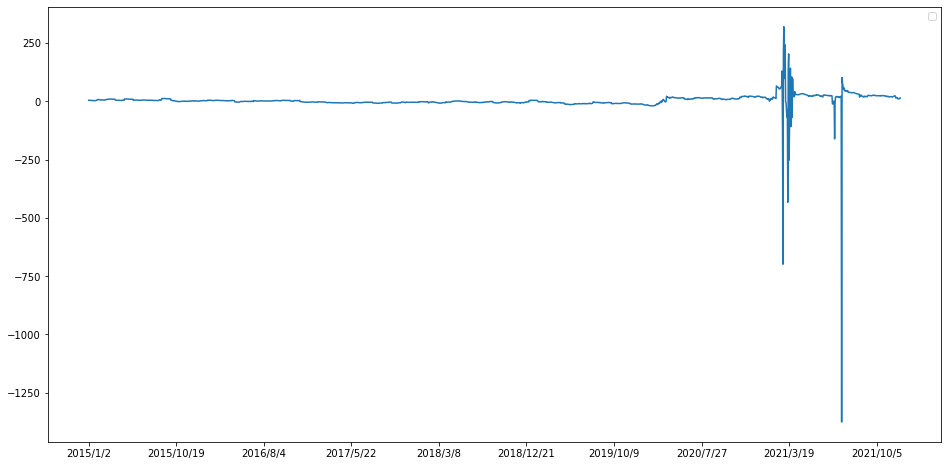

In [6]:

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(data['Today_value'])
plt.xticks(data.index[::200],data.index[::200])
plt.legend()
plt.show()